In [ ]:
import torch
import json
import torchvision
import os
import ultralytics
from matplotlib import pyplot as plt, patches

In [5]:
yolo = ultralytics.YOLO("yolov8m.pt")

100%|██████████| 49.7M/49.7M [00:17<00:00, 2.94MB/s]


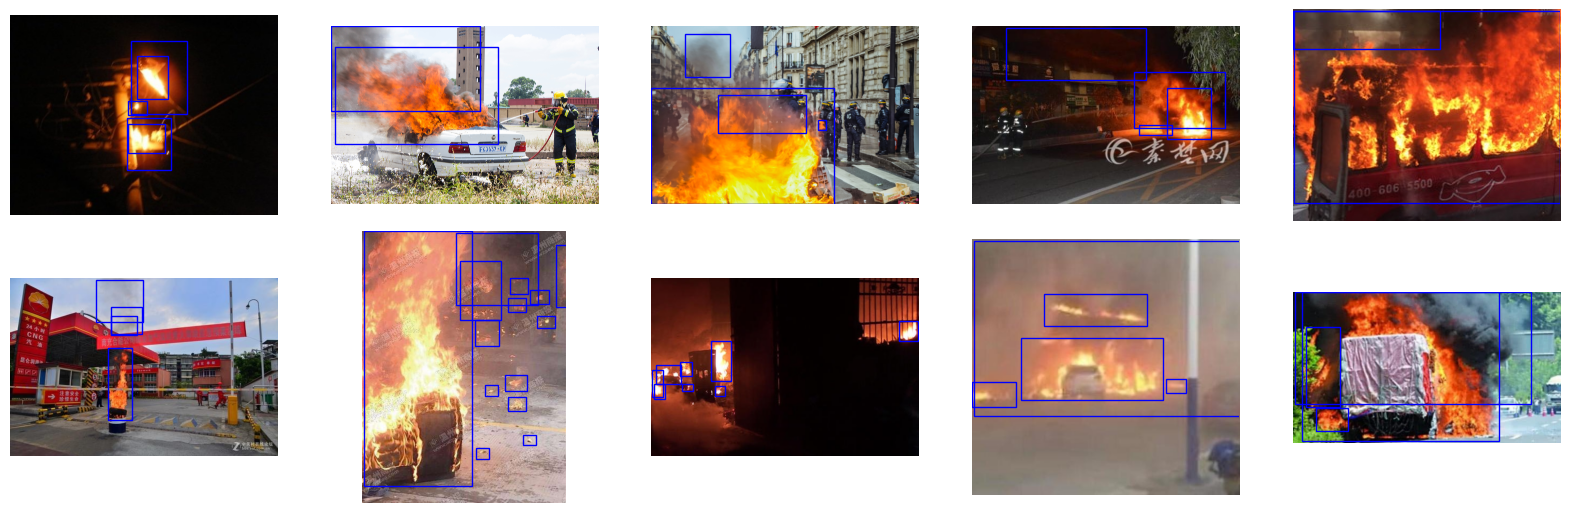

In [56]:
with open('./data/475_fire_train/annotations/instances_default.json', 'r') as f:
    data = json.load(f)

    row = 1

    plt.figure(figsize=(20, 12))

    for index, image_data in enumerate(data['images'][:10]):
        if index % 5 == 0:
            row += 1

        image = torchvision.io.read_image(
            os.path.join('data', '475_fire_train', 'images', image_data['file_name'])
        )
        image = image.permute(1, 2, 0)

        ax = plt.subplot(row, 5, index + 1)

        annotations = [a for a in data['annotations'] if a['image_id'] == image_data['id'] and a['category_id'] in (4, 5)]

        for annotation in annotations:
            x, y, w, h = annotation['bbox']
            patch = patches.Rectangle(
                (x, y), w, h,
                linewidth=1,
                edgecolor='b',
                facecolor='none',
            )
            ax.add_patch(patch)

        ax.axis('off')
        ax.imshow(image)
        

    plt.show()  

In [ ]:
# Have a hash image id to image name
# Iterate over annotations and for each annotation add an entry to a *.txt file

# if not os.path.exists('./converted_data/train'):
#     shutil.copytree('./data/475_fire_train/images/train', './converted_data/train/images')
#     os.makedirs('./converted_data/train/labels')

with open('./data/475_fire_train/annotations/instances_default.json', 'r') as f:
    data = json.load(f)

    image_id_to_image = { image['id']: image for image in data['images'] }

    result = dict()

    for annotation in data['annotations']:
        # we are interested only in fire and smoke categories from the dataset
        if annotation['category_id'] != 4 and annotation['category_id'] != 5:
            continue
        
        image_id = annotation['image_id']
        image = image_id_to_image[image_id]
        image_w, image_h = image['width'], image['height']
        x, y, w, h = annotation['bbox']

        x = (x + w / 2) / image_w
        y = (y + h / 2) / image_h
        w = w / image_w
        h = h / image_h

        normalized_bbox = [x, y, w, h]

        result.setdefault(image_id, []).append([annotation['category_id'], *normalized_bbox])

    for image_id, annotations in result.items():
        image_name = image_id_to_image[image_id]['file_name']

        with open


{1: [[5,
   0.476765306122449,
   0.4624523160762943,
   0.06932653061224489,
   0.06692098092643052],
  [5,
   0.508265306122449,
   0.6166212534059946,
   0.1389795918367347,
   0.14659400544959128],
  [4,
   0.5177244897959183,
   0.6416621253405995,
   0.16373469387755102,
   0.2605449591280654],
  [5,
   0.5323469387755102,
   0.31239782016348777,
   0.11408163265306122,
   0.21607629427792915],
  [4,
   0.5578571428571429,
   0.3110354223433242,
   0.21000000000000002,
   0.3615803814713896]],
 2: [[4,
   0.2790509259259259,
   0.23778935185185185,
   0.5581018518518518,
   0.4755787037037037],
  [5,
   0.3208429783950617,
   0.38842592592592595,
   0.6112847222222222,
   0.5456018518518518]],
 3: [[4,
   0.4133464888405008,
   0.4949591670069416,
   0.3304708764289603,
   0.21416496529195592],
  [5,
   0.3414534567229178,
   0.672641894650878,
   0.6828524768644529,
   0.6547162106982443],
  [4,
   0.20912493195427329,
   0.16426704777460185,
   0.16932226456178553,
   0.2385708